### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2018
---

## Final Project Report

## Project Title: The Relationship between Different Demographic Attributes of the United States

## Student(s): Linh Mai

#### Date: 06/15/2018
---

#### Abstract
---

Understanding relationship between different attributes of the population has always been an important aspect of a good poppulation adminitrative system. Thus, for this project, I will use a dataset contained different attributes about the demography of the United State on Kaggle to analyze whether there exists a relationship between some of those attributes.

The dataset that I used is from U.S. Census Reports and is in the CSV format. It contain 80 columns and 39031 rows.

##### Final findings:

- Most populous states are located near the coast and water bodies
- There is a linear relationship between high school degree vs Household's Income relationship
- States with high population density are usually the states that have high household income.
- States with high household income are usually the states that have high rent.
- States with high married rate are usually the states that have high debt rate.
- Appearently, there is no linear relationship between average age and the divorced rate in each state.
- There is no linear relationship between highschool degree and divorced rate
- There is a linear relationship between Highschool degree and debt rate

### 1. Introduction
---

Using the dataset on Kaggle, my project will investigate the relationship between different attributes like income, average rent, graduation rate, divorced rate and debt rate of every county in the United States. The main goal of this project is to understand if there exists any connections between any of these attributes. Thus, to complete that goal, the datasets will contain data about those attributes for each of the county.

Originally, the data set contain 75 fields that fall under multiple different themes. However, for this project, I will only keep fields that are related to Debt, Rent, High School Graduation, Population Demographics, Age Demographics and Household Income. After cleaning the data, I will plot these graphs to identify the relationship between different attributes. For example: 

-	Graduation rate vs Household Income
-	Average rent in each states vs Average Household income in each state
-	Graduation rate vs Debt Rate
-	Average age vs Household Income
-	Divorced rate vs Graduation rate

The dataset will have 39031 rows and 22 columns

From these graphs, I will try to conclude whether or not there are relationships between those attributes.

### 2. Problem Definition
---

Geography of economic inequality is one of the main questions that the governments are trying to solve. This problem may come from the difference of economic resources and opportunities distribute between different areas. Hence, this project will try to answer the question if residential context plays a significant role in the diversity of income or education of the United States. 

Many different groups can be interested in the analyzed data of this project. For example, the US government can look at the data and reconsider the allocation of their economic resources. Other groups that can benefit from this project are investors and manufacturers who are looking for new places to set up their business. 

Who would be benefitted from the solutions presented in this project:
-	Policy makers
-	Investors
-	Residents in areas that lack of economic resources and opportunities.

### 3. Data Sources
---

-	The source of the data is from 2012-2016 ACS 5-Year Documentation provided by the U.S. Census Reports. Retrieved May 2, 2018
-	The format of the original data is CSV.
-	The data can be accessed from this link below:
https://www.kaggle.com/goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics/data

### 4. Acquiring and Loading Data
---

In [48]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

### Since the format of the data is csv, I will need to use the read_csv of pandas to import the dataset into a dataframe. Next, i can use the head() function to preview the dataset.

In [49]:
originaldf = pd.read_csv("real_estate_db.csv", engine='python')
originaldf.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,...,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
1,220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,...,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
2,220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,...,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838
3,220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,...,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563
4,220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,...,34.96611,31.75000,20.49887,655.98066,2905.0,0.56936,0.51034,0.08315,0.06731,0.08711


### 5. Exploring and Visualizing Data
---

### In order to view the number of row and columns in the dataset, I used the df.shape function.

In [50]:
originaldf.shape

(39030, 80)

In [51]:
originaldf.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,...,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
1,220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,...,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
2,220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,...,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838
3,220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,...,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563
4,220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,...,34.96611,31.75000,20.49887,655.98066,2905.0,0.56936,0.51034,0.08315,0.06731,0.08711


### In order to view the number of non-null values in the data set, I used the info() function.

In [52]:
originaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 80 columns):
UID                            39030 non-null int64
BLOCKID                        0 non-null float64
SUMLEVEL                       39030 non-null int64
COUNTYID                       39030 non-null int64
STATEID                        39030 non-null int64
state                          39030 non-null object
state_ab                       39030 non-null object
city                           39030 non-null object
place                          39030 non-null object
type                           39030 non-null object
primary                        39030 non-null object
zip_code                       39030 non-null int64
area_code                      39030 non-null int64
lat                            39030 non-null float64
lng                            39030 non-null float64
ALand                          39030 non-null int64
AWater                         39030 non-null int64

### To check if the null value of the data set, I used the isnull() function. I will then use .sum() function to count the number null values in each column.

In [53]:
originaldf.isnull().sum()

UID                             0
BLOCKID                     39030
SUMLEVEL                        0
COUNTYID                        0
STATEID                         0
state                           0
state_ab                        0
city                            0
place                           0
type                            0
                            ...  
female_age_mean               302
female_age_median             302
female_age_stdev              302
female_age_sample_weight      302
female_age_samples            302
pct_own                       390
married                       275
married_snp                   275
separated                     275
divorced                      275
Length: 80, dtype: int64

### 6. Wrangling and Cleansing Data
---

#### The first thing that I need to do is dropping columns that I will not be using in my analysis.The original dataset has 80 columns but I will only keep 19 columns. 

In [54]:
drop_column = ["BLOCKID","SUMLEVEL","COUNTYID","STATEID","primary","area_code","lat","lng","AWater","male_pop","female_pop","rent_median","rent_stdev","rent_sample_weight","rent_samples","rent_gt_10","rent_gt_15","rent_gt_20","rent_gt_25","rent_gt_30","rent_gt_35","rent_gt_40","rent_gt_50","universe_samples","used_samples","hi_median","hi_stdev","hi_sample_weight","hi_samples","family_mean","family_median","family_stdev","family_sample_weight","family_samples","hc_mortgage_mean","hc_mortgage_median","hc_mortgage_stdev","hc_mortgage_sample_weight","hc_mortgage_samples","hc_mean","hc_median","hc_stdev","hc_samples","hc_sample_weight","home_equity_second_mortgage","second_mortgage","home_equity","second_mortgage_cdf","home_equity_cdf","debt_cdf","hs_degree_male","hs_degree_female","male_age_median","male_age_stdev","male_age_sample_weight","male_age_samples","female_age_median","female_age_stdev","female_age_sample_weight","female_age_samples","pct_own"]
newdf = originaldf.drop(drop_column, axis = 1)
newdf.shape

(39030, 19)

### Next step, I will need to check for the values that is null in the data set using the isnull() function. After that, I will use the dropna function to drop all row that contains a value of null. After that, since the age catergory is divided into male and female, I will add a new column to the dataframe called average age using the average value of the column male_age_mean and female_age_mean.
### The population density will be caculated by taking the information in the population column divided by the information from the "ALand" column.

In [55]:
newdf.isnull().sum()

UID                  0
state                0
state_ab             0
city                 0
place                0
type                 0
zip_code             0
ALand                0
pop                  0
rent_mean          462
hi_mean            390
debt               677
hs_degree          275
male_age_mean      273
female_age_mean    302
married            275
married_snp        275
separated          275
divorced           275
dtype: int64

In [56]:
newdf.dropna(inplace = True)
newdf['Average Age'] = newdf[['male_age_mean','female_age_mean']].mean(axis = 1)
newdf['Population Density'] = newdf['pop']/newdf['ALand']
newdf.head()

,UID,state,state_ab,city,place,type,zip_code,ALand,pop,rent_mean,...,debt,hs_degree,male_age_mean,female_age_mean,married,married_snp,separated,divorced,Average Age,Population Density
0,220336,Alaska,AK,Unalaska,Unalaska City,City,99685,2823180154,4619,1366.24657,...,0.72770,0.82841,38.45838,32.78177,0.47388,0.30134,0.03443,0.09802,35.620075,0.000002
1,220342,Alaska,AK,Eagle River,Anchorage,City,99577,509234898,3727,2347.69441,...,0.75689,0.94090,37.26216,38.97956,0.52381,0.01777,0.00782,0.13575,38.120860,0.000007
2,220343,Alaska,AK,Jber,Anchorage,City,99505,270593047,8736,2071.30766,...,0.00000,0.99097,21.96291,22.20427,0.50459,0.06676,0.01000,0.01838,22.083590,0.000032
3,220345,Alaska,AK,Anchorage,Point Mackenzie,City,99501,2371512,1941,943.79086,...,0.78212,0.89274,35.81912,37.00750,0.44428,0.05933,0.00000,0.21563,36.413310,0.000818
4,220347,Alaska,AK,Anchorage,Anchorage,City,99504,1979230,5981,1372.84472,...,0.67246,0.95351,34.13110,34.96611,0.51034,0.08315,0.06731,0.08711,34.548605,0.003022


### In the end I have the dataframe as shown above with 38283 rows and 21 columns

In [57]:
newdf.shape

(38283, 21)

### 7. Analyzing Data
---

### Since the data is seperated into many different counties and cities in the US, I will using the group by method to combine them based on their states. Then, depends on the attributes, I used numpy to either calculate the average value or the total sum for each state.

In [58]:
grouped = newdf.groupby('state')
new_table = grouped.agg({'rent_mean':np.mean,'pop':np.sum, 'debt':np.mean, 'hs_degree':np.mean, 'hi_mean':np.mean, 'divorced':np.mean,'married':np.mean, 'Average Age': np.mean, 'Population Density': np.sum})
print(new_table['Average Age'].to_dict())
new_table['Population Density'].min()

{'Alabama': 39.68391997528833, 'Alaska': 36.83867370192309, 'Arizona': 39.70555094351739, 'Arkansas': 39.53078103064066, 'California': 38.304532473914044, 'Colorado': 38.518440864197515, 'Connecticut': 40.3803279840547, 'Delaware': 40.610406851851856, 'District of Columbia': 37.51982218085106, 'Florida': 42.88159651610022, 'Georgia': 37.875034768431036, 'Hawaii': 40.72917098101267, 'Idaho': 38.14948834459459, 'Illinois': 38.59921477488904, 'Indiana': 38.78161423270441, 'Iowa': 40.16967868357489, 'Kansas': 38.78168386682243, 'Kentucky': 39.26050728318581, 'Louisiana': 38.68204566386552, 'Maine': 43.05490413157895, 'Maryland': 39.19576861073825, 'Massachusetts': 39.87643072178476, 'Michigan': 39.93017161223073, 'Minnesota': 39.35332481962481, 'Mississippi': 38.415247011494266, 'Missouri': 39.57938021557717, 'Montana': 41.22754924528306, 'Nebraska': 38.767996040892164, 'Nevada': 38.8476928695652, 'New Hampshire': 41.21223358974359, 'New Jersey': 39.934222555667986, 'New Mexico': 39.615803

0.02573284065126707

### Next step, I will display the data of the population number of each state on a color based US map. The darker the color is, the higher the number of the population of the state will be. 

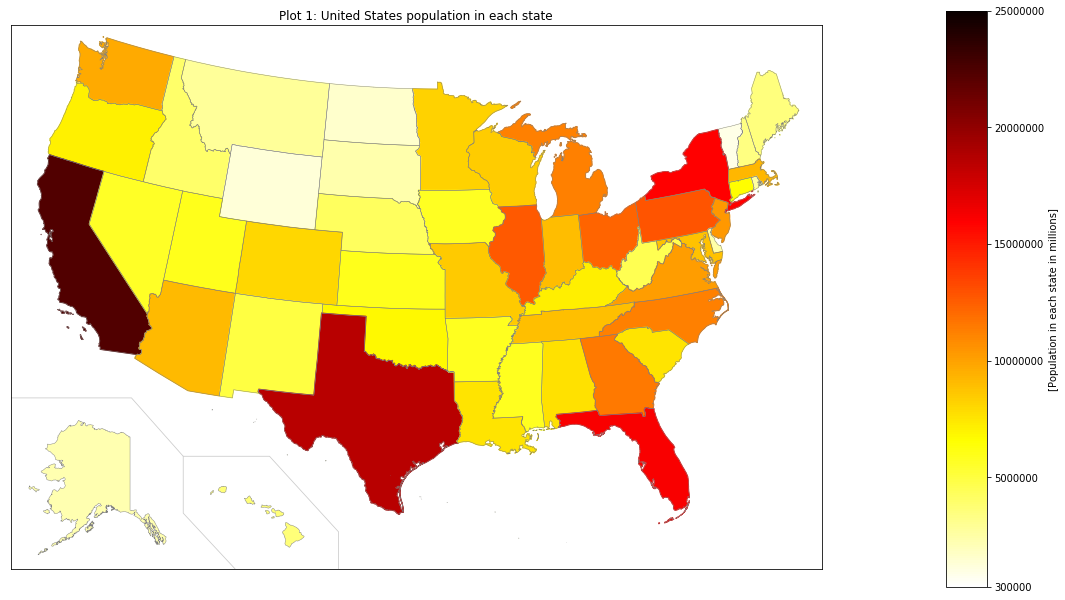

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize =(19,10))

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------

shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

## population by state
population = new_table['pop'].to_dict()

#%% -------- choose a color for each state based on population. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 300000; vmax = 25000000 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = population[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('Plot 1: United States population in each state')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ticks = [300000,5000000,10000000,15000000,20000000,25000000,30000000]
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[Population in each state in millions]')
cb.set_ticks(ticks)
cb.set_ticklabels(ticks)
plt.show()
fig.savefig('population.jpg')

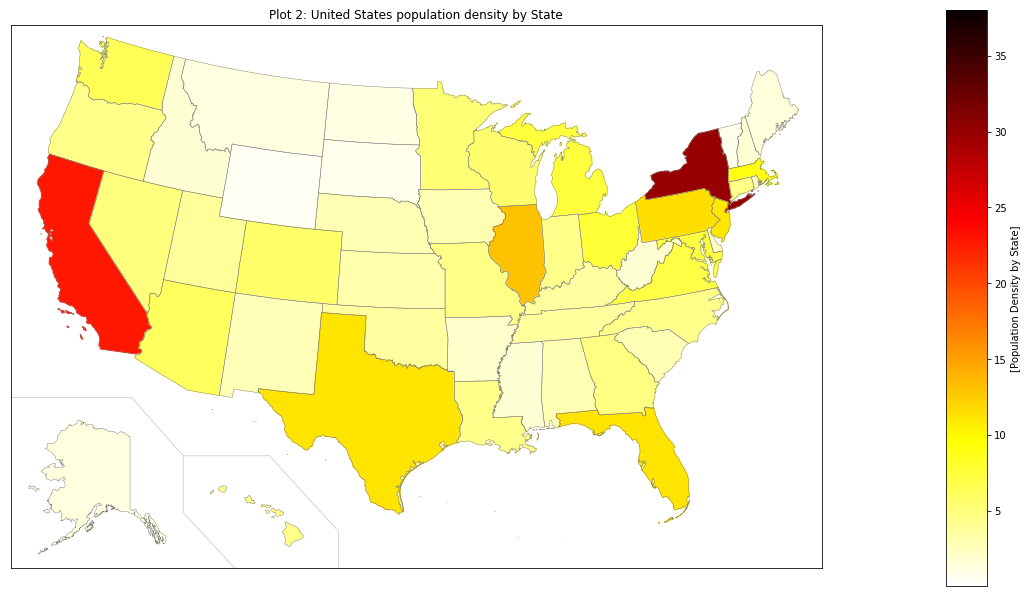

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize =(19,10))

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------

shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

## population by state
totaldensity = new_table['Population Density'].to_dict()

#%% -------- choose a color for each state based on population. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 0.02; vmax = 38 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        density = totaldensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((density-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('Plot 2: United States population density by State')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
##ticks = [300000,5000000,10000000,15000000,20000000,25000000,30000000]
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[Population Density by State]')
##cb.set_ticks(ticks)
##cb.set_ticklabels(ticks)
plt.show()
fig.savefig('density.jpg')

### In this part, I will display the average household's income of each state using the same color based map. The same rule will be applied, the darker the color of the state is, the higher of the avergae househole's income that state has. 

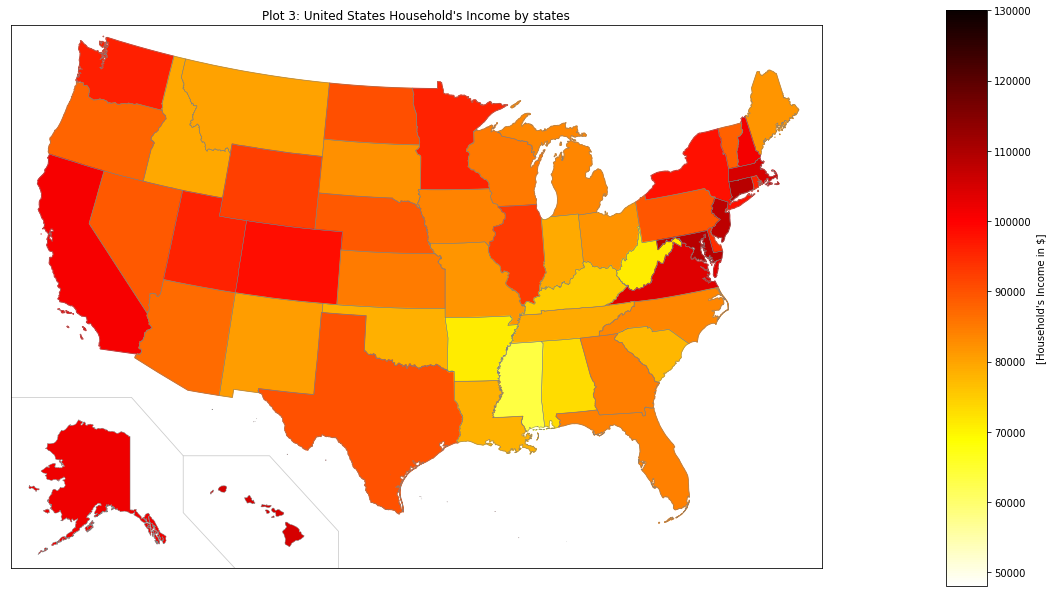

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots(figsize =(19,10))

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------

shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

## rent mean
hi_mean = new_table['hi_mean'].to_dict()

#%% -------- choose a color for each state based on average rent in each state. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 48000; vmax = 130000 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        income = hi_mean[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # income), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((income-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)

#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title("Plot 3: United States Household's Income by states")

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ticks = [20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000]
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r"[Household's Income in $]")
#cb.set_ticks(ticks)
#cb.set_ticklabels(ticks)
plt.show()
fig.savefig('income.jpg')

### In this step, to show the relationship between household's income and the percentage of people with at least high school degree, I used a scatter plot with the high school degreee as x axis and househole's income as y axis

Text(0.5,1,"Plot 4: Percentage of people with at least high school degree vs Household's Income")

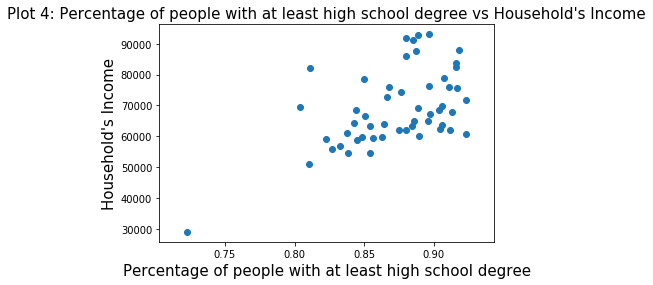

In [62]:
plt.scatter(new_table['hs_degree'], new_table['hi_mean'])
plt.xlabel('Percentage of people with at least high school degree', fontsize = 15)
plt.ylabel("Household's Income", fontsize = 15)
plt.title("Plot 4: Percentage of people with at least high school degree vs Household's Income", fontsize = 15)


### In this step, to show the relationship between household's income and the average rent in each state , I used a scatter plot with the Average rent as x axis and househole's income as y axis

Text(0.5,1,"Plot 5: Household's Income vs Average Rent")

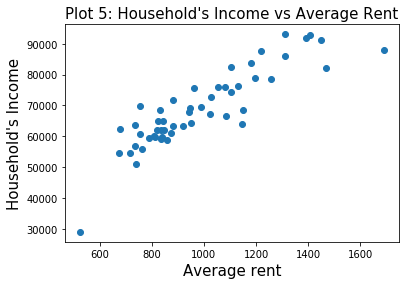

In [63]:
plt.scatter(new_table['rent_mean'], new_table['hi_mean'])
plt.xlabel('Average rent', fontsize = 15)
plt.ylabel("Household's Income", fontsize = 15)
plt.title("Plot 5: Household's Income vs Average Rent", fontsize = 15)

### In this step, to show the relationship between Debt Rate and the Married Rate in each state , I used a scatter plot with the Debt Rate as x axis and Married Rate as y axis

Text(0.5,1,'Plot 6: Married Rate vs Debt')

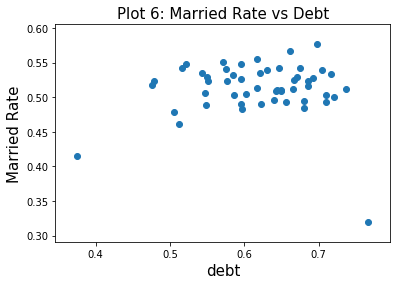

In [64]:
plt.scatter(new_table['debt'], new_table['married'])
plt.xlabel('debt', fontsize = 15)
plt.ylabel("Married Rate", fontsize = 15)
plt.title("Plot 6: Married Rate vs Debt", fontsize = 15)

### In this step, to show the relationship between Average Age and the Divorced Rate in each state , I used a scatter plot with the Averaged Age as x axis and Divorced Rate as y axis

Text(0.5,1,'Plot 7: Age vs Divorced rate')

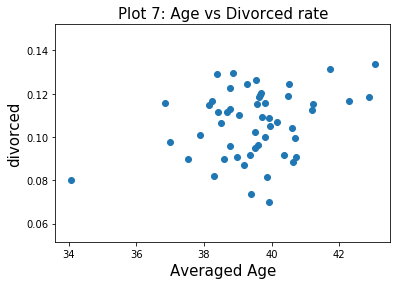

In [65]:
plt.scatter(new_table['Average Age'], new_table['divorced'])
plt.xlabel('Averaged Age', fontsize = 15)
plt.ylabel("divorced", fontsize = 15)
plt.title("Plot 7: Age vs Divorced rate", fontsize = 15)

Text(0.5,1,'Plot 8: Highschool Graduation vs Divorced Rate')

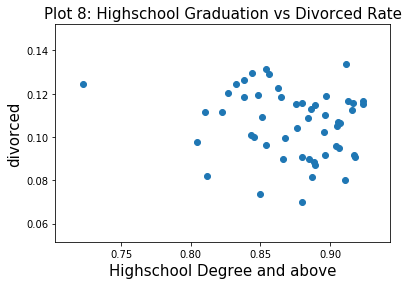

In [66]:
plt.scatter(new_table['hs_degree'], new_table['divorced'])
plt.xlabel('Highschool Degree and above', fontsize = 15)
plt.ylabel("divorced", fontsize = 15)
plt.title("Plot 8: Highschool Graduation vs Divorced Rate", fontsize = 15)

Text(0.5,1,'Plot 9: Highschool Graduation vs Debt Rate')

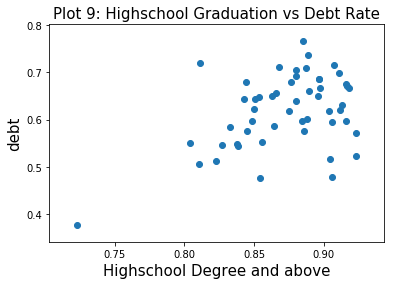

In [67]:
plt.scatter(new_table['hs_degree'], new_table['debt'])
plt.xlabel('Highschool Degree and above', fontsize = 15)
plt.ylabel("debt", fontsize = 15)
plt.title("Plot 9: Highschool Graduation vs Debt Rate", fontsize = 15)

### 8. Reporting Results
---

### 1) The relationship between population
Based on the color map that displays the Population in each state, we can clearly see that top populous states are all located next to or near the two coasts.


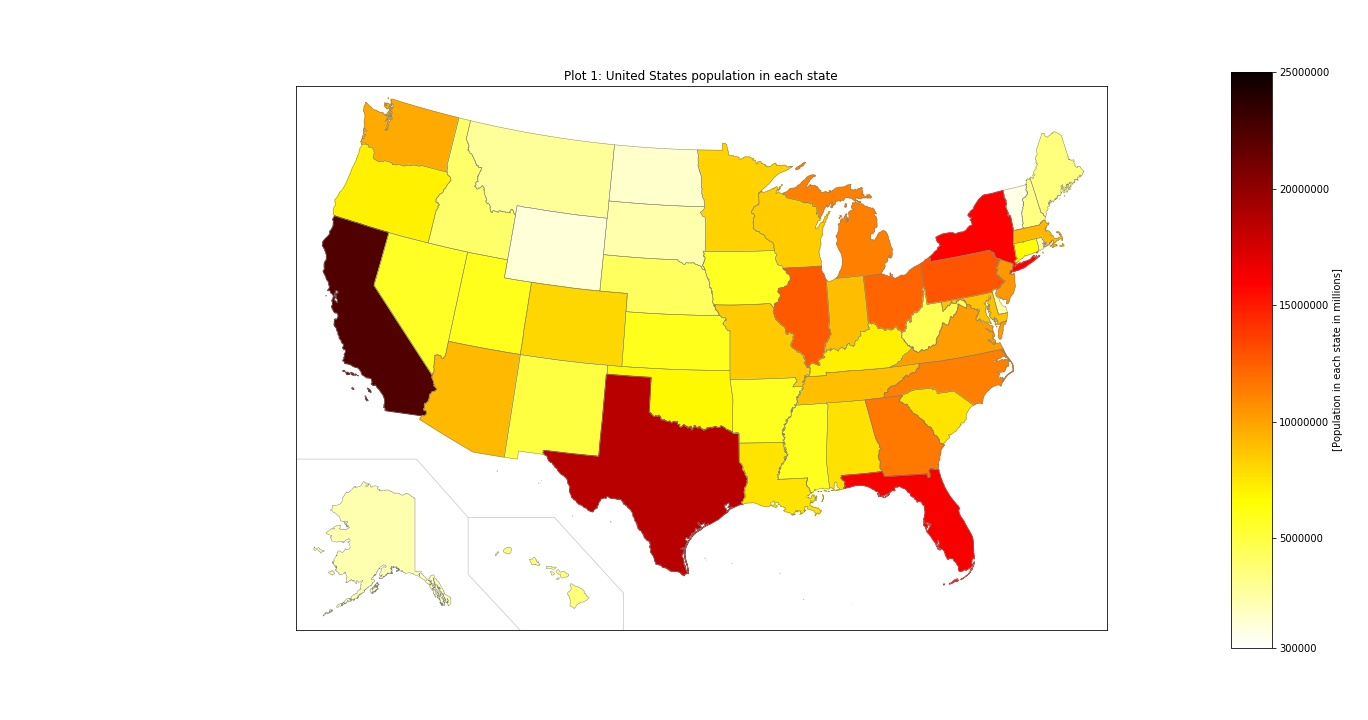

In [68]:
from IPython.display import Image
Image(filename='population.jpg') 

#### Top ten most populous states are:

In [69]:
new_table.nlargest(10, 'pop')

,rent_mean,pop,debt,hs_degree,hi_mean,divorced,married,Average Age,Population Density
state,,,,,,,,,
California,1469.686378,20037586,0.720190,0.811286,82203.534696,0.081940,0.499652,38.304532,13.756644
Texas,988.500278,13794651,0.550237,0.804190,69575.055850,0.097764,0.528865,36.984560,3.332990
Florida,1146.285359,10546116,0.586041,0.864620,64103.107410,0.118267,0.503292,42.881597,3.360291
New York,1258.660763,10203826,0.622930,0.850045,78641.013243,0.073724,0.490736,39.402762,23.851412
Pennsylvania,947.115215,6761807,0.602076,0.888403,69130.277634,0.088626,0.504830,40.640596,3.479271
Illinois,1027.388659,6547448,0.655681,0.866134,72722.604723,0.089856,0.492450,38.599215,4.536216
Ohio,820.618145,6097241,0.640277,0.880185,62088.423193,0.115555,0.495292,39.810611,1.540168
Georgia,951.029369,5376772,0.642936,0.843108,64380.372788,0.100716,0.509546,37.875035,0.648801
Michigan,918.307776,5197289,0.596214,0.884219,63473.790379,0.108887,0.489713,39.930172,1.425855


From the list above and the first plot, we can see that these 7 states: California, Texas, Florida, Pennsylvania, Georgia,North Carolina,New York are very close to the sea. The other three states, Ohio, Illinois and Michigan are all located next to the Great Lake. Thus,we can notice on deciding factor for the variation of population between each state which is having access to water body. It is understandable since having access to a large body of water allows the population to thrive on two advantage:

    - Commerce: Cities near water allow for water transportation, which is generally faster than land transportation.
    - Sustainability: Having access to the lake and ocean mean that the cities can have fresh source of water and plenty of food to supply their population.

### 2) Population Density and Household's Income

From the plot 2 and 3, we can see that there is a connection between the household income and the population density in each state. 

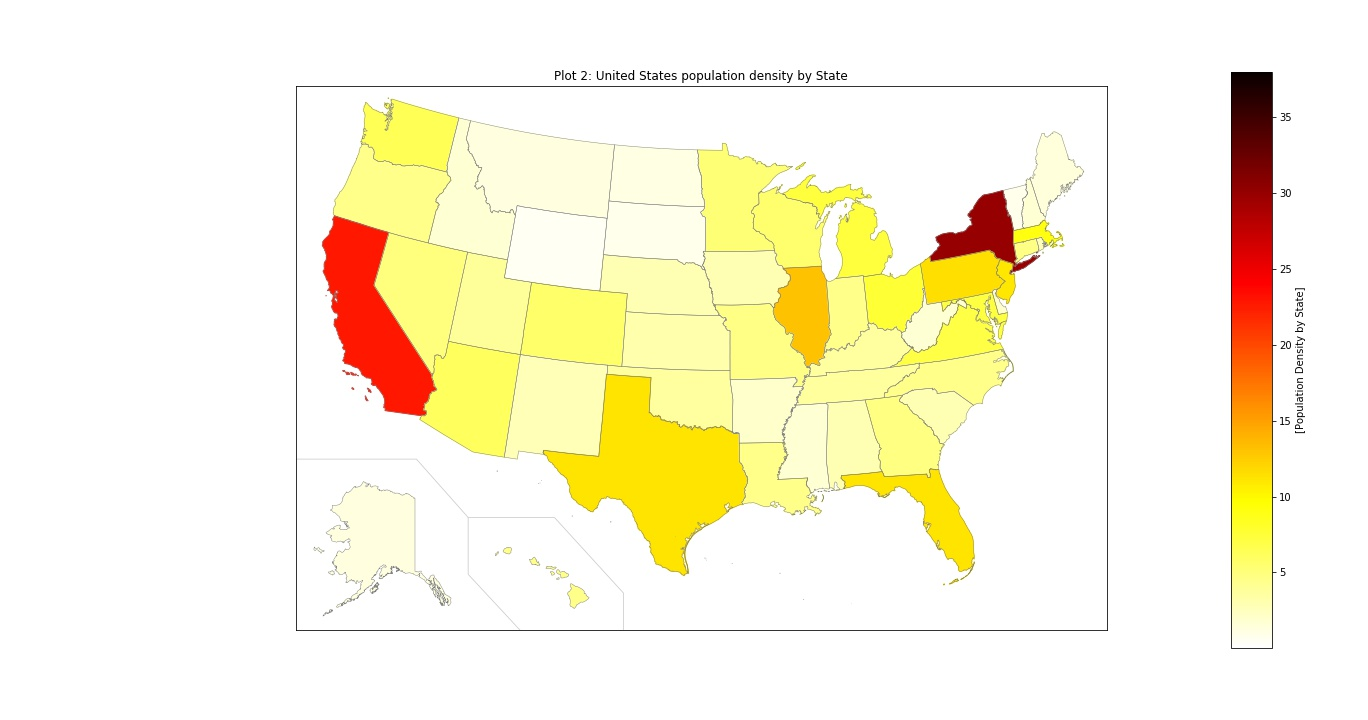

In [70]:
from IPython.display import Image
Image(filename='density.jpg') 

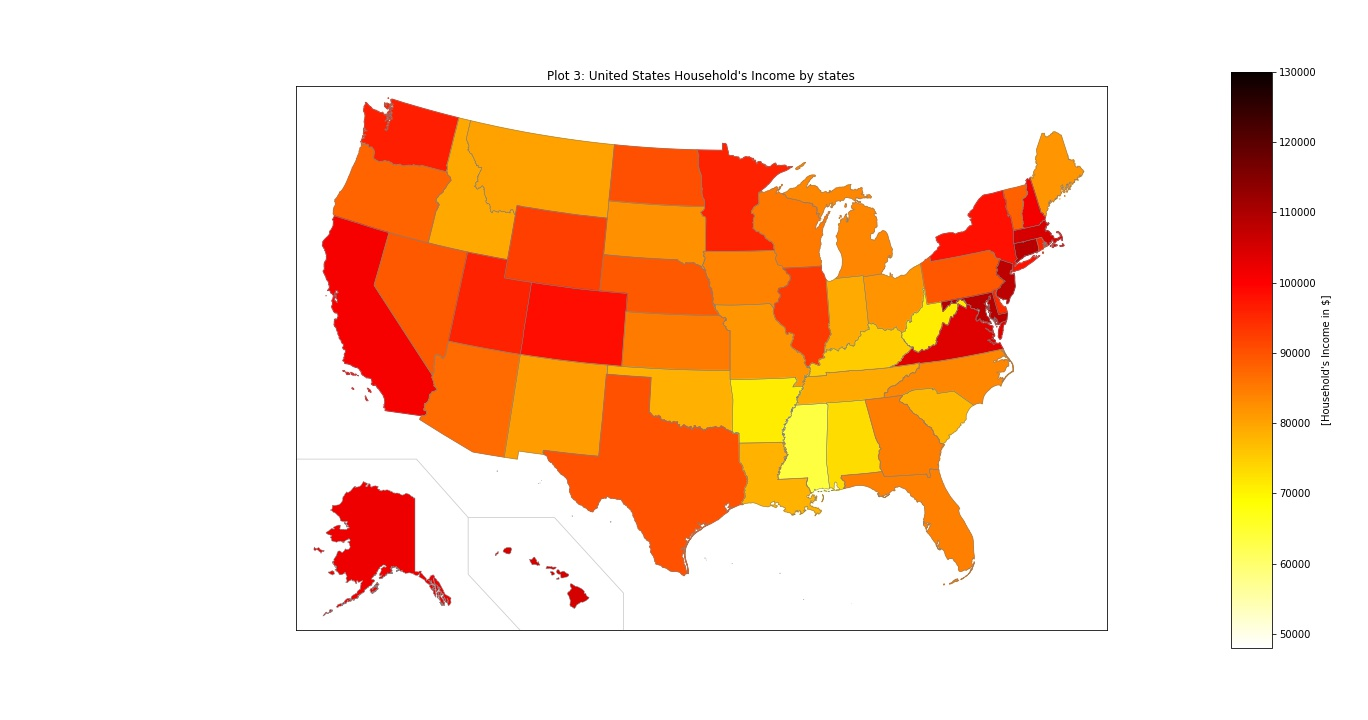

In [71]:
from IPython.display import Image
Image(filename='income.jpg') 

The top ten states with the highest population density:

In [72]:
new_table.nlargest(10, 'Population Density')

,rent_mean,pop,debt,hs_degree,hi_mean,divorced,married,Average Age,Population Density
state,,,,,,,,,
New York,1258.660763,10203826,0.622930,0.850045,78641.013243,0.073724,0.490736,39.402762,23.851412
California,1469.686378,20037586,0.720190,0.811286,82203.534696,0.081940,0.499652,38.304532,13.756644
Illinois,1027.388659,6547448,0.655681,0.866134,72722.604723,0.089856,0.492450,38.599215,4.536216
Pennsylvania,947.115215,6761807,0.602076,0.888403,69130.277634,0.088626,0.504830,40.640596,3.479271
Florida,1146.285359,10546116,0.586041,0.864620,64103.107410,0.118267,0.503292,42.881597,3.360291
Texas,988.500278,13794651,0.550237,0.804190,69575.055850,0.097764,0.528865,36.984560,3.332990
New Jersey,1392.093929,4449281,0.692340,0.880244,91754.977046,0.069976,0.528108,39.934223,3.229162
Massachusetts,1219.354189,3533352,0.709990,0.887162,87534.765533,0.081585,0.493742,39.876431,2.237951
Ohio,820.618145,6097241,0.640277,0.880185,62088.423193,0.115555,0.495292,39.810611,1.540168


The top ten states with the highest household income (District of Columbia is not a state):

In [73]:
new_table.nlargest(11, 'hi_mean')

,rent_mean,pop,debt,hs_degree,hi_mean,divorced,married,Average Age,Population Density
state,,,,,,,,,
Connecticut,1312.591437,1907666,0.686103,0.896528,93099.558861,0.091620,0.516404,40.380328,0.578871
Maryland,1407.003683,3238846,0.737357,0.888985,92978.269197,0.086857,0.511677,39.195769,1.378287
New Jersey,1392.093929,4449281,0.692340,0.880244,91754.977046,0.069976,0.528108,39.934223,3.229162
District of Columbia,1447.610589,344993,0.767057,0.884882,91292.675391,0.089720,0.319026,37.519822,0.608456
Hawaii,1691.417881,745124,0.665845,0.918034,87952.886419,0.090961,0.512431,40.729171,0.565914
Massachusetts,1219.354189,3533352,0.709990,0.887162,87534.765533,0.081585,0.493742,39.876431,2.237951
Virginia,1311.846083,4256985,0.704293,0.880247,86163.851044,0.090566,0.539337,38.970362,1.349320
Alaska,1181.644323,460580,0.597279,0.916261,83722.558433,0.115703,0.482793,36.838674,0.063374
New Hampshire,1103.867774,694959,0.674454,0.915837,82587.122456,0.112249,0.542288,41.212234,0.098937


Based on the 2 plots and the two table, we can see that states with high population density are usually the one with high household income.

### 3) Percentage of people with at least high school degree vs Household's Income relationship

Based on the scatter plot 4, we can see a linear relationship between the two attributes. As the percentage of people with at least high school degree gets higher, the household's income of that state will also get higher.

### 4) Household's Income vs Average Rent

Based on the scatter plot 5, we can see a linear relationship between the two attributes. As the percentage of average rent increases, the household's income of that state will also get higher.

### 5) Married Rate vs Debt

Similarly, the scatter plot 6 shows a linear relationship between these two attributes. As the marriage rate gets higher, the debt rate of that state will also get higher.

### 6) Age vs Divorced rate

The plot 7 shows that there is no linear relationship between these two attributes. As the marriage rate increases, the divorced rate is not affected.

### 7) Highschool Degree and above vs Divorced rate

The plot 8 shows that there is no linear relationship between these two attributes. As the rate of people who own a highschool degree or higher increases, the divorced rate is not affected.

### 8) Highschool Degree and above vs Debt Rate

The plot 9 shows that there is apearently a linear relationship between these two attributes. As the rate of people who own a highschool degree or higher increases, the debt rate is increased.

### 9. Conclusion
---

In conclusion, after the data anaylsis gave a great overview of the relationship between different demography attributes of each state of the US.
 - Most populous states are located near the coast and water bodies
 - There is a linear relationship between high school degree vs Household's Income relationship
 - States with high population density are usually the states that have high household income.
 - States with high household income are usually the states that have high rent.
 - States with high married rate are usually the states that have high debt rate.
 - Appearently, there is no linear relationship between average age and the divorced rate in each state.
 - There is no linear relationship between highschool degree and divorced rate
 - There is a linear relationship between Highschool degree and debt rate

### Shortcomings:

For the shortcomings of this project:
    - There are a number of null value in the dataset that had to be dropped. Thus, this issue might slightly altered the result.
    - The plot of average age vs divorced and highschool gradation vs divorced rate does not show us any insight about the   relationship of the paired attributes.

### Future work

- For future work, the credibility of the data can be improved a lot if there was no null value in the dataset. Thus, another analysis should be performed with a better set of data.

### Lessons learned:

From this project, I learned a lot of lessons about how to handle a dataset properly:
    - Where to acquire the data and how to import the data into python with correct format.
    - How to handle null value and clean the dataset for easier analysis.
    - How to use plot, dataframe to visualize the results
    - How to understand the result that I got from the analysis process.

### 10. References

2012-2016 ACS 5-Year Documentation provided by the U.S. Census Reports. Retrieved May 2, 2018